In [1]:
!wget -q -r -A '*ubyte.gz' --no-parent 'http://yann.lecun.com/exdb/mnist/'
!rm -rf Data
!mkdir Data
!mv yann.lecun.com/exdb/mnist/* Data/
!rm -rf yann.lecun.com
!gunzip Data/*
!pip install idx2numpy

import idx2numpy 
import numpy as np
import matplotlib.pyplot as plt

x=idx2numpy.convert_from_file("/content/Data/train-images-idx3-ubyte")
y=idx2numpy.convert_from_file("/content/Data/train-labels-idx1-ubyte")
xr=(x.reshape(x.shape[0],-1).T)/255

o_h=np.zeros((10,60000))

for i in range(60000):
   o_h[y[i],i]=1 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7920 sha256=2c1dd57212edbd2e42247e9ba746f49332228350c04b86067150e919fdcf2c1a
  Stored in directory: /root/.cache/pip/wheels/1a/ce/ad/d5e95a35cfe34149aade5e500f2edd535c0566d79e9a8e1d8a
Successfully built idx2numpy


In [ ]:
o_h

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [2]:
def softmax(x):
  return np.exp(x)/np.sum(np.exp(x),axis=0)



In [8]:
w=np.random.rand(784,10)*10e-3
b=np.random.rand(10,1)


In [5]:
a=0.05

In [9]:
c=[]
for i in range(500):
  #FORWARD PROPAGATION
  z= np.dot(w.T,xr)+b
  Y=softmax(z)

  #LOSS AND COST
  loss= -np.sum(o_h*np.log(Y+10**(-15)),axis=0,keepdims=True) 
  cost = 1/60000 * (np.sum(loss,axis=1))

  #CALCULATING GRADIENTS
  dz=Y-o_h
  dw=np.dot(xr,dz.T)/60000
  db=np.sum(dz,axis=1,keepdims=True)/60000

  #GRADIENT DESCENT
  w=w-a*dw
  b=b-a*db
  if i%10==0:
    print(cost)
  c.append(cost) 

[2.34006232]
[1.85391098]
[1.54928339]
[1.33942264]
[1.19044956]
[1.08084489]
[0.99736331]
[0.93181537]
[0.879003]
[0.83551821]
[0.79905338]
[0.76799853]
[0.74119977]
[0.71781]
[0.69719391]
[0.67886594]
[0.66244866]
[0.64764424]
[0.6342145]
[0.62196658]
[0.61074267]
[0.60041228]
[0.5908666]
[0.5820141]
[0.57377723]
[0.56608981]
[0.55889502]
[0.55214378]
[0.54579345]
[0.53980683]
[0.53415127]
[0.52879802]
[0.52372165]
[0.51889955]
[0.51431161]
[0.50993981]
[0.505768]
[0.50178163]
[0.49796758]
[0.49431397]
[0.49081001]
[0.48744591]
[0.48421271]
[0.48110225]
[0.47810704]
[0.47522021]
[0.47243544]
[0.46974691]
[0.46714926]
[0.46463751]


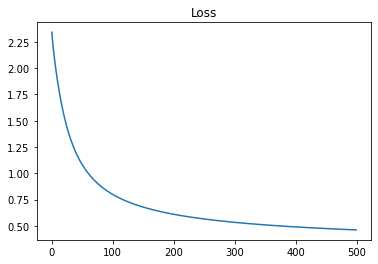

In [10]:
import matplotlib.pyplot as plt 
plt.plot(c)
plt.title("Loss")
plt.show()


In [12]:
t=idx2numpy.convert_from_file("/content/Data/t10k-images-idx3-ubyte")
tl=idx2numpy.convert_from_file("/content/Data/t10k-labels-idx1-ubyte")

In [19]:
s=0
a=[]
for i in range(1,10000):
  tr=(t.reshape(t.shape[0],-1).T)/255
  out=np.dot(w.T,tr[:,i])
  if tl[i]==np.argmax(softmax((out.reshape(10,1))+b)):
    s=s+1
print(s/100)



88.9


Enter the index:65
4


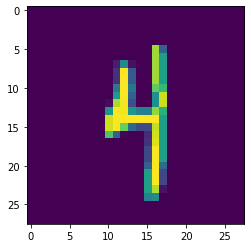

In [20]:
index=int(input("Enter the index:"))
out=np.dot(w.T,tr[:,index])
print(np.argmax(softmax((out.reshape(10,1))+b)))
plt.imshow(t[index])
plt.show()